In [133]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [134]:
# Write Script that Pulls csv data from medicare site and saves down to separate folder
def pull_all_2017_datasets(base_url):
    for month_num in list(range(1,13)):
        file_name = "ful2017{}.csv".format(str(month_num))
        pull = pd.read_csv(base_url+file_name)
        pull.to_csv('/Users/jim_jack/Documents/Mod_3_Project/Mod_3_Project/raw_datasets/'+file_name)

In [135]:
# Files Saved; commenting out run file
# pull_all_2017_datasets('http://www.nber.org/data/federal-upper-limits/2017/')

In [4]:
# Explore initial dataset (June 2017)
df = pd.read_csv("/Users/jim_jack/Documents/Mod_3_Project/Mod_3_Project/raw_datasets/ful20176.csv",index_col="Unnamed: 0")

In [5]:
# confirmed no obvious NaN data
df.isna().any()

productgroup                        False
ingredient                          False
strength                            False
dosage                              False
route                               False
mdrunittype                         False
weightedaverageamps                 False
acaful                              False
packagesize                         False
ndc                                 False
arated                              False
multipliergreaterthan175percento    False
year                                False
month                               False
dtype: bool

In [6]:
df.head()

,productgroup,ingredient,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,arated,multipliergreaterthan175percento,year,month
0,7975,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Yes,Y,2017,6
1,4792,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Yes,Y,2017,6
2,4794,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Yes,Y,2017,6
3,4793,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Yes,Y,2017,6
4,4795,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Yes,Y,2017,6


In [7]:
strip_updated_ingredient = list(map(lambda ingr: ingr.strip(),list(df.ingredient)))
HCL_updated_ingredient = list(map(lambda ingr: ingr.replace('HYDROCHLORIDE','HCL'),strip_updated_ingredient))
HCL_updated_ingredient

['OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'RALOXIFENE HCL',
 'RALOXIFENE HCL',
 'RALOXIFENE HCL',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'HYDROXYUREA',
 'ENTECAVIR',
 'ENTECAVIR',
 'ENTECAVIR',
 'PRAVASTATIN SODIUM',
 'PRAVASTATIN SODIUM',
 'PRAVASTATIN SODIUM',
 'VALGANCICLOVIR HCL',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'IBANDRONATE SODIUM',
 'IBANDRONATE SODIUM',
 'MYCOPHENOLATE MOFETIL',
 'MYCOPHENOLATE MOFETIL',
 'MYCOPHENOLATE MOFETIL',
 'MYCOPHENOLATE MOFETIL',
 'CAPECITABINE',
 'NAPROXEN SODIUM',
 'NAPROXEN',
 'NAPROXEN',
 'LISINOPRIL',
 'ALENDRONATE SODIUM',
 'FINASTERID

In [8]:
# KEEP ME; UPDATES INGREDIENT LIST; UNCOMMENT WHEN KERNEL IS RERUN; THEN RECOMMENT; OTHERWISE WILL CAUSE DUPS


df['ingredient_normalized'] = HCL_updated_ingredient
df.drop('ingredient',axis=1,inplace=True)
# arated only has 146 negative occurances in 15K+ instances; removed for irrelevancy
df.drop('arated',axis=1,inplace=True)

In [9]:
# function takes a df column and returns a list of unique delimited (/ and ;) values; Lots going on here
def create_unique_ingr_list(df_column):
    local_ingr_list = []
#     Loop through single df column series and delimit values by backslash and semi-colon; creates list_of_lists
    for ingr in df_column:
        local_ingr_list.append(re.split('/|; ',ingr))
#     This line flattens the list of lists, strips away trailing and leading spaces, sets, and sorts alphabetically the drug list
    return sorted(list(set([item.strip() for sublist in local_ingr_list for item in sublist])))



In [10]:
unique_list_of_ingredients = create_unique_ingr_list(HCL_updated_ingredient)
len(unique_list_of_ingredients)

440

In [11]:
add_drugs = pd.DataFrame(columns=unique_list_of_ingredients)

In [12]:
df2 = df.join(add_drugs)

In [13]:
df2.fillna(0,inplace=True)
df2.head()

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,...,VENLAFAXINE HCL,VERAPAMIL HCL,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Y,...,0,0,0,0,0,0,0,0,0,0
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Y,...,0,0,0,0,0,0,0,0,0,0
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Y,...,0,0,0,0,0,0,0,0,0,0
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Y,...,0,0,0,0,0,0,0,0,0,0
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Y,...,0,0,0,0,0,0,0,0,0,0


In [14]:
sample_update = df2.loc[0:50,['ingredient_normalized','OLANZAPINE','DULOXETINE HCL']]

In [15]:
# proof of filler concept; need to apply across columns
sample_update.OLANZAPINE[sample_update.ingredient_normalized.str.contains('OLANZAPINE',regex=False)] = 1
sample_update

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ingredient_normalized,OLANZAPINE,DULOXETINE HCL
0,OLANZAPINE/FLUOXETINE HCL,1,0
1,OLANZAPINE/FLUOXETINE HCL,1,0
2,OLANZAPINE/FLUOXETINE HCL,1,0
3,OLANZAPINE/FLUOXETINE HCL,1,0
4,OLANZAPINE/FLUOXETINE HCL,1,0
5,DULOXETINE HCL,0,0
6,DULOXETINE HCL,0,0
7,DULOXETINE HCL,0,0
8,DULOXETINE HCL,0,0
9,DULOXETINE HCL,0,0


In [16]:
sample_update_2 = df2.loc[0:50,['ingredient_normalized','OLANZAPINE','DULOXETINE HCL']]

In [17]:
# Proof of concept for updating all columns
for ingr in sample_update_2.columns[1:]:
    sample_update_2[ingr][sample_update.ingredient_normalized.str.contains(ingr,regex=False)] = 1

sample_update_2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ingredient_normalized,OLANZAPINE,DULOXETINE HCL
0,OLANZAPINE/FLUOXETINE HCL,1,0
1,OLANZAPINE/FLUOXETINE HCL,1,0
2,OLANZAPINE/FLUOXETINE HCL,1,0
3,OLANZAPINE/FLUOXETINE HCL,1,0
4,OLANZAPINE/FLUOXETINE HCL,1,0
5,DULOXETINE HCL,0,1
6,DULOXETINE HCL,0,1
7,DULOXETINE HCL,0,1
8,DULOXETINE HCL,0,1
9,DULOXETINE HCL,0,1


In [18]:
# fuctionalization of the above
def fill_ingredient_dummies(df_):
    for ingr in df_.columns[14:]:
        df_[ingr][df_.ingredient_normalized.str.contains(ingr,regex=False)] = 1

In [19]:
df3 = df2

In [20]:
df2.head()

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,...,VENLAFAXINE HCL,VERAPAMIL HCL,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Y,...,0,0,0,0,0,0,0,0,0,0
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Y,...,0,0,0,0,0,0,0,0,0,0
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Y,...,0,0,0,0,0,0,0,0,0,0
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Y,...,0,0,0,0,0,0,0,0,0,0
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Y,...,0,0,0,0,0,0,0,0,0,0


In [21]:
fill_ingredient_dummies(df3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
# sample test
df3_sample = df3.iloc[:50,13:]
df3_sample["SUM"] = df3_sample.iloc[:,1:].sum(axis=1)
df3_sample['Multi-Ingredient ?'] = 0
df3_sample.loc[df3_sample['SUM'] > 1, 'Multi-Ingredient ?'] = 1
df3_sample

,ABACAVIR SULFATE,ACAMPROSATE CALCIUM,ACARBOSE,ACETAMIN,ACETAMINOPHEN,ACETAZOLAMIDE,ACITRETIN,ACYCLOVIR,ADAPALENE,ALENDRONATE SODIUM,...,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# sub sample test
df3_sub_sample = df3_sample.loc[:,['ingredient_normalized','OLANZAPINE','FLUOXETINE HCL']]
df3_sub_sample["SUM"] = df3_sub_sample.iloc[:,1:].sum(axis=1)
df3_sub_sample['Multi-Ingredient ?'] = 0
df3_sub_sample.loc[df3_sub_sample['SUM'] > 1, 'Multi-Ingredient ?'] = 1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [24]:
df4 = df3

In [25]:
# Adding in multi-ingredient column
df4["SUM"] = df4.iloc[:,14:].sum(axis=1)
df4['Multi-Ingredient ?'] = 0
df4.loc[df4['SUM'] > 1, 'Multi-Ingredient ?'] = 1
df4

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,...,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.234670,30.0,2323030,Y,...,0,0,0,0,0,0,0,0,2,1
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.952780,30.0,2323130,Y,...,0,0,0,0,0,0,0,0,2,1
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.129000,30.0,2323230,Y,...,0,0,0,0,0,0,0,0,2,1
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.742670,30.0,2323330,Y,...,0,0,0,0,0,0,0,0,2,1
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.192900,30.0,2323430,Y,...,0,0,0,0,0,0,0,0,2,1
5,5028,20 MG ...,CAPSULE DR,ORAL,CAP,0.239553,0.419218,60.0,2323560,N,...,0,0,0,0,0,0,0,0,1,0
6,5029,30 MG ...,CAPSULE DR,ORAL,CAP,0.242719,0.424758,30.0,2324030,N,...,0,0,0,0,0,0,0,0,1,0
7,5029,30 MG ...,CAPSULE DR,ORAL,CAP,0.242719,0.424758,90.0,2324090,N,...,0,0,0,0,0,0,0,0,1,0
8,5030,60 MG ...,CAPSULE DR,ORAL,CAP,0.410402,0.718204,1000.0,2327004,N,...,0,0,0,0,0,0,0,0,1,0
9,5030,60 MG ...,CAPSULE DR,ORAL,CAP,0.410402,0.718204,30.0,2327030,N,...,0,0,0,0,0,0,0,0,1,0


In [26]:
df4_strength = df4.strength
df4_strength_list = list(map(lambda x: x.replace(" ",""),df4_strength))
len(set(df4_strength_list))

317

In [27]:
df4_updated_ingredient = list(map(lambda stren: stren.replace(' ',''),list(df4.strength)))
df4['strength_normalized'] = df4_updated_ingredient
df4.drop('strength',axis=1,inplace=True)

In [28]:
values = df4.strength_normalized.value_counts()
df4_values = values.rename_axis('type').reset_index(name='counts')

In [29]:
df4_values.sort_values('type')

,type,counts
279,.025MG/24H,4
290,.0375MG/24,4
280,.075MG/24H,4
188,0.005%,9
261,0.005MG,5
106,0.01%,16
157,0.02-3(24),10
277,0.025MG,5
232,0.025MG;2.5MG,6
172,0.03-3MG,10


In [30]:
df4[df4.strength_normalized == '875MG;125MG']

,productgroup,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,year,...,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?,strength_normalized
978,1696,TABLET,ORAL,TAB,0.312548,0.546959,20.0,93227534,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG
2485,1696,TABLET,ORAL,TAB,0.312548,0.546959,20.0,378083194,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG
2486,1696,TABLET,ORAL,TAB,0.312548,0.546959,100.0,378083201,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG
4596,1696,TABLET,ORAL,TAB,0.312548,0.546959,20.0,781185220,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG
5919,1696,TABLET,ORAL,TAB,0.312548,0.546959,20.0,16714029701,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG
5920,1696,TABLET,ORAL,TAB,0.312548,0.546959,100.0,16714029702,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG
6039,1696,TABLET,ORAL,TAB,0.312548,0.546959,20.0,16714047801,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG
6040,1696,TABLET,ORAL,TAB,0.312548,0.546959,100.0,16714047802,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG
7516,1696,TABLET,ORAL,TAB,0.312548,0.546959,20.0,43598022114,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG
10701,1696,TABLET,ORAL,TAB,0.312548,0.546959,20.0,60505254102,N,2017,...,0,0,0,0,0,0,0,2,1,875MG;125MG


Text(0.5, 1.0, 'strength value counts')

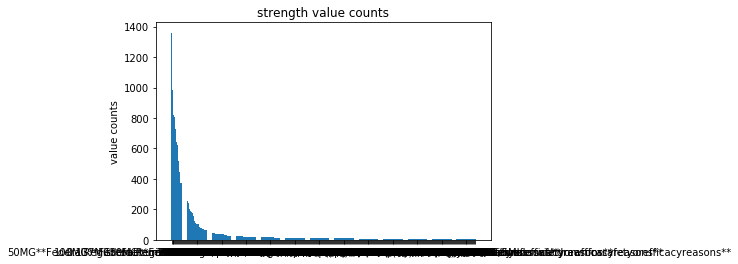

In [31]:
# Might need to do a log transformation on this data; if i consider it a 
plt.bar(df4_values['type'],df4_values['counts'])
plt.ylabel('value counts')
plt.title('strength value counts')

In [32]:
df4.multipliergreaterthan175percento[df4.multipliergreaterthan175percento == 'N'] = 0
df4.multipliergreaterthan175percento[df4.multipliergreaterthan175percento == 'Y'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Classifications')

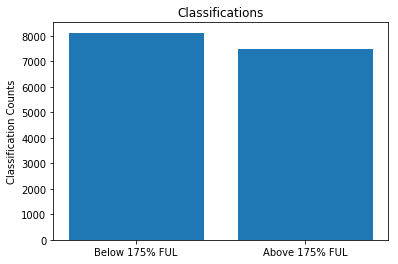

In [33]:
classification = df4.multipliergreaterthan175percento.value_counts()
df4_class = classification.rename_axis('class').reset_index(name='counts')
plt.bar(df4_class['class'],df4_class['counts'])
plt.xticks(ticks=[0,1],labels=['Below 175% FUL',"Above 175% FUL"])
plt.ylabel('Classification Counts')
plt.title('Classifications')

In [34]:
df4_class.head()

,class,counts
0,0,8120
1,1,7498


In [35]:
# use onehotencoder tomorrow for categorical variables
# regularization
# ridge, lasso --> (drops completely)
# Google strength normalization 
#     kaggle
#     maybe google scholar?

In [36]:
# Dosage Data Viz
df4_dosage = df4.dosage.value_counts()
df4_dosage_values = df4_dosage.rename_axis('dosage').reset_index(name='counts')
df4_dosage_values
# plt.bar(df4_dosage_values['dosage'],df4_dosage_values['counts'])
# plt.ylabel('value counts')
# plt.title('dosage value counts')

,dosage,counts
0,TABLET,10957
1,CAPSULE,1779
2,"TABLET, EXTENDED RELEASE",622
3,"CAPSULE, EXTENDED RELEASE",262
4,TAB ER 24H,174
5,"TABLET, ORALLY DISINTEGRATING",147
6,"TABLET, DELAYED RELEASE",137
7,"CAPSULE, DELAYED REL PELLETS",137
8,CAPSULE DR,132
9,TAB CHEW,93


In [37]:
# Route Data Viz; resampling?
df4_route = df4.route.value_counts()
df4_route_values = df4_route.rename_axis('route').reset_index(name='counts')
df4_route_values
# plt.bar(df4_route_values['route'],df4_route_values['counts'])
# plt.ylabel('value counts')
# plt.title('route value counts')

,route,counts
0,ORAL,15171
1,TOPICAL,134
2,TRANSDERMAL,77
3,OPHTHALMIC,69
4,ORAL-28,51
5,TRANSDERM,37
6,RECTAL,20
7,SUBLINGUAL,19
8,NASAL,13
9,TRANSMUCOSAL,8


In [38]:
# mdrunittype Data Viz; resampling?
df4_mdrunittype = df4.mdrunittype.value_counts()
df4_mdrunittype_values = df4_mdrunittype.rename_axis('mdrunittype').reset_index(name='counts')
df4_mdrunittype_values
# plt.bar(df4_mdrunittype_values['mdrunittype'],df4_mdrunittype_values['counts'])
# plt.ylabel('value counts')
# plt.title('mdrunittype value counts')

,mdrunittype,counts
0,TAB,12480
1,CAP,2546
2,ML,349
3,TDP,109
4,GM,105
5,SUP,15
6,EA,14


In [39]:
unittype_viz = df4.groupby(["mdrunittype", "multipliergreaterthan175percento"]).size().reset_index(name="counts")
type(unittype_viz)

pandas.core.frame.DataFrame

In [40]:
tuple(unittype_viz.counts[unittype_viz.multipliergreaterthan175percento == 0])

(1329, 8, 25, 149, 6518, 91)

In [41]:
# N = len(list(set(unittype_viz.mdrunittype)))
# neg_instance = tuple(unittype_viz.counts[unittype_viz.multipliergreaterthan175percento == 0])

# fig, ax = plt.subplots()

# ind = np.arange(N)    # the x locations for the groups
# width = 0.35         # the width of the bars
# p1 = ax.bar(ind, neg_instance, width, color='r')


# pos_instance = tuple(unittype_viz.counts[unittype_viz.multipliergreaterthan175percento == 1])
# p2 = ax.bar(ind + width, pos_instance, width,
#             color='y')

# ax.set_title('MDRUNITTYPE')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(('Positive', 'Negative'))

# ax.legend((p1[0], p2[0]), ('Below 175% FUL', 'Above 175% FUL'))
# ax.autoscale_view()

# plt.show()

In [42]:
df5 = pd.get_dummies(df4,columns=["dosage"])

In [43]:
df6 = pd.get_dummies(df5,columns=['route'])

In [44]:
df7 = pd.get_dummies(df6,columns=['strength_normalized'])

In [45]:
df8 = pd.get_dummies(df7,columns=['mdrunittype'])

In [46]:
# most common ingredient
# ingredient combinations

In [47]:
data_for_model = df8.drop(['productgroup','ndc','year','month','ingredient_normalized'],axis=1)

In [48]:
data_for_model.head()

,weightedaverageamps,acaful,packagesize,multipliergreaterthan175percento,ABACAVIR SULFATE,ACAMPROSATE CALCIUM,ACARBOSE,ACETAMIN,ACETAMINOPHEN,ACETAZOLAMIDE,...,strength_normalized_9.5MG/24HR,strength_normalized_90MG,strength_normalized_9MG,mdrunittype_CAP,mdrunittype_EA,mdrunittype_GM,mdrunittype_ML,mdrunittype_SUP,mdrunittype_TAB,mdrunittype_TDP
0,2.276870,7.23467,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2.400121,7.95278,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.713770,13.12900,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2.758260,9.74267,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3.614041,14.19290,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
X = data_for_model.drop(['multipliergreaterthan175percento'],axis=1)
y = data_for_model.multipliergreaterthan175percento

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

In [51]:
#original setup --> logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
logreg = LogisticRegression()
logit_model = logreg.fit(X_train,y_train)
logit_model

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
y_pred_train_logit = logit_model.predict(X_train)
y_pred_test_logit = logit_model.predict(X_test)

In [53]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = metrics.accuracy_score(true, preds)
    f1 = metrics.f1_score(true, preds)
    recall = metrics.recall_score(true, preds)
    precision = metrics.precision_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    print("Recall: {}".format(recall))
    print("Precision: {}".format(precision))

In [54]:
y_test.value_counts()
y_test.mean()
1 - y_test.mean()
null_accuacy_general = y_test.value_counts().head(1) / len(y_test)

print("Null Accuracy: "+str(null_accuacy_general))
print("")
print("Training Metrics")
display_acc_and_f1_score(y_train, y_pred_train_logit, model_name='Logit')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, y_pred_test_logit, model_name='Logit')

Null Accuracy: 0    0.533419
Name: multipliergreaterthan175percento, dtype: float64

Training Metrics
Model: Logit
Accuracy: 0.9440792282079741
F1-Score: 0.9413870246085011
Recall: 0.9267089499647639
Precision: 0.9565375522822331

Testing Metrics
Model: Logit
Accuracy: 0.9354673495518566
F1-Score: 0.9299999999999999
Recall: 0.9187705817782656
Precision: 0.9415073115860517


In [55]:
list_of_feature_columns = pd.DataFrame(data_for_model.columns.drop('multipliergreaterthan175percento'))

In [109]:
feature_coefs = pd.DataFrame(logit_model.coef_[0])

In [111]:
pd_logit_coefs = list_of_feature_columns.merge(feature_coefs, left_index=True,right_index=True)

In [129]:
pd_logit_coefs.columns = ["feature_name",'coefficient']

In [132]:
top_coef_ = pd_logit_coefs[pd_logit_coefs['coefficient'].isin(list(pd_logit_coefs.coefficient.nlargest(10)))].sort_values(by="coefficient",ascending=False)
top_coef_

,feature_name,coefficient
39,BENAZEPRIL HCL,4.183613
708,strength_normalized_3.125MG,3.964966
246,LOVASTATIN,3.591401
496,dosage_TAB ER 24,3.191545
195,HCTZ,3.177555
580,strength_normalized_10-12.5MG,3.162456
379,ROSUVASTATIN CALCIUM,3.061383
493,dosage_TAB CHEW,2.975501
121,DICLOFENAC SODIUM,2.968124
222,LABETALOL HCL,2.951111


In [ ]:
# bot_coef_ = pd_logit_coefs[pd_logit_coefs['coefficient'].isin(list(pd_logit_coefs.coefficient.nsmallest(10)))].sort_values(by="coefficient")
bot_coef_

In [120]:
list(pd.concat([top_coef_,bot_coef_]).feature_name)

['BENAZEPRIL HCL',
 'strength_normalized_3.125MG',
 'LOVASTATIN',
 'dosage_TAB ER 24                     ',
 'HCTZ',
 'strength_normalized_10-12.5MG',
 'ROSUVASTATIN CALCIUM',
 'dosage_TAB CHEW                      ',
 'DICLOFENAC SODIUM',
 'LABETALOL HCL',
 'GABAPENTIN',
 'LAMOTRIGINE',
 'LEVETIRACETAM',
 'WARFARIN SODIUM',
 'dosage_TAB ER PRT                    ',
 'PHENYTOIN',
 'VALSARTAN',
 'AMLODIPINE BESYLATE',
 'LISINOPRIL',
 'CYCLOSPORINE']

In [125]:
df4[df4.ingredient_normalized == "AMLODIPINE BESYLATE"]

,productgroup,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,year,...,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?,strength_normalized
335,2256,TABLET,ORAL,TAB,0.024387,0.042677,90.0,54010022,0,2017,...,0,0,0,0,0,0,0,2,1,2.5MG
336,2256,TABLET,ORAL,TAB,0.024387,0.042677,1000.0,54010031,0,2017,...,0,0,0,0,0,0,0,2,1,2.5MG
337,2257,TABLET,ORAL,TAB,0.019189,0.033581,100.0,54010120,0,2017,...,0,0,0,0,0,0,0,2,1,5MG
338,2257,TABLET,ORAL,TAB,0.019189,0.033581,90.0,54010122,0,2017,...,0,0,0,0,0,0,0,2,1,5MG
339,2257,TABLET,ORAL,TAB,0.019189,0.033581,300.0,54010128,0,2017,...,0,0,0,0,0,0,0,2,1,5MG
340,2257,TABLET,ORAL,TAB,0.019189,0.033581,1000.0,54010131,0,2017,...,0,0,0,0,0,0,0,2,1,5MG
341,2255,TABLET,ORAL,TAB,0.024790,0.043383,100.0,54010220,0,2017,...,0,0,0,0,0,0,0,2,1,10MG
342,2255,TABLET,ORAL,TAB,0.024790,0.043383,90.0,54010222,0,2017,...,0,0,0,0,0,0,0,2,1,10MG
343,2255,TABLET,ORAL,TAB,0.024790,0.043383,300.0,54010228,0,2017,...,0,0,0,0,0,0,0,2,1,10MG
344,2255,TABLET,ORAL,TAB,0.024790,0.043383,1000.0,54010231,0,2017,...,0,0,0,0,0,0,0,2,1,10MG


In [113]:
significant_coefs = pd.concat([top_coef_,bot_coef_]).sort_values(by="feature_name")


,feature_name,coefficient
22,AMLODIPINE BESYLATE,-3.797411
39,BENAZEPRIL HCL,4.183613
104,CYCLOSPORINE,-3.709826
121,DICLOFENAC SODIUM,2.968124
182,GABAPENTIN,-4.479223
195,HCTZ,3.177555
222,LABETALOL HCL,2.951111
224,LAMOTRIGINE,-4.366549
229,LEVETIRACETAM,-4.237776
240,LISINOPRIL,-3.760083


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

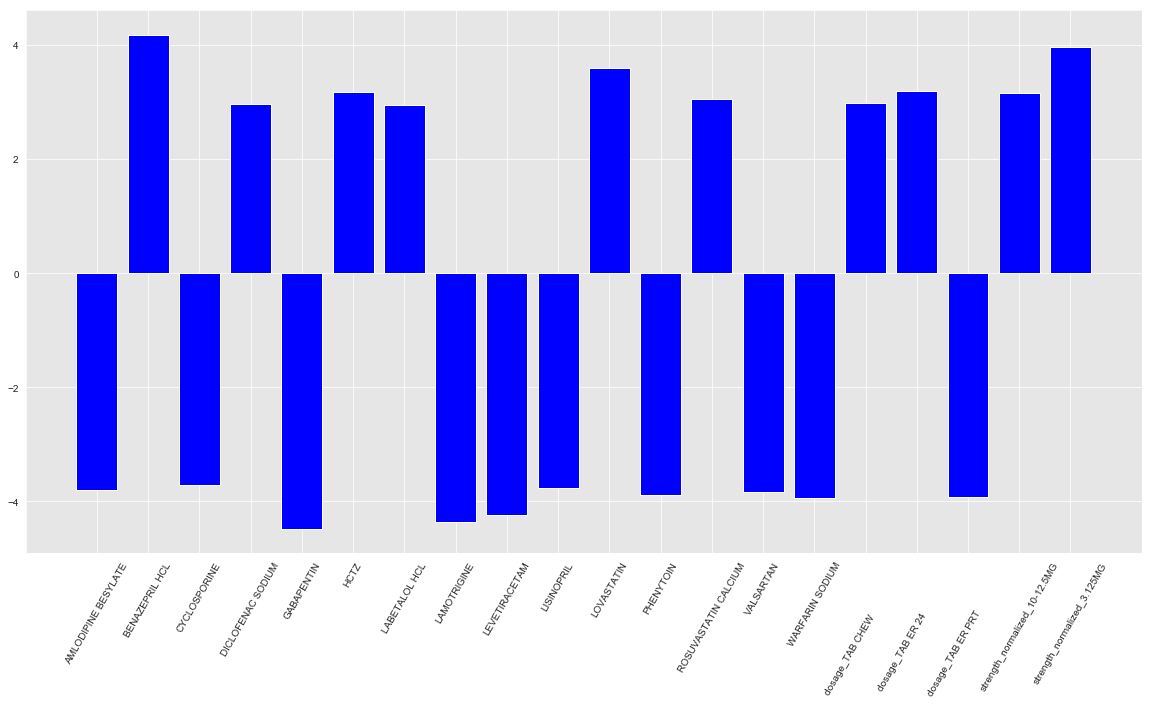

In [115]:
fig = plt.figure(figsize=[20,10])
plt.bar(significant_coefs['feature_name'],significant_coefs['coefficient'],color='blue')
plt.xticks(rotation=60)

# plt.legend(loc='upper right');
# ax.set_title("Decision Boundary")
# ax.set_xlabel('N/2')
# ax.set_ylabel('Predicted Probability')
# plt.axhline(.5, color='black')
# plt.show()





In [64]:
from sklearn.model_selection import GridSearchCV

params = {'fit_intercept':[True, False]}
logreg_2 = LogisticRegression()
logit_gs = GridSearchCV(logreg_2,params,cv=5)
logit_model_gs = logit_gs.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [65]:
sam_test = logit_model_gs.predict_proba(X_test)[0:10]

In [66]:
y_pred_train_logit_gs = logit_model_gs.predict(X_train)
y_pred_test_logit_gs = logit_model_gs.predict(X_test)

In [67]:
print("Training Metrics")
display_acc_and_f1_score(y_train, y_pred_train_logit_gs, model_name='Logit_GS')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, y_pred_test_logit_gs, model_name='Logit_GS')

Training Metrics
Model: Logit_GS
Accuracy: 0.9447622300008538
F1-Score: 0.94205105239588
Recall: 0.9265327695560254
Precision: 0.9580980142102387

Testing Metrics
Model: Logit_GS
Accuracy: 0.9362355953905249
F1-Score: 0.9307756463719766
Recall: 0.9187705817782656
Precision: 0.9430985915492958


In [68]:
from sklearn.metrics import roc_curve, auc

In [69]:
y_score_logit = logit_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score_logit)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9844187144586382


AUC: 0.9844187144586382


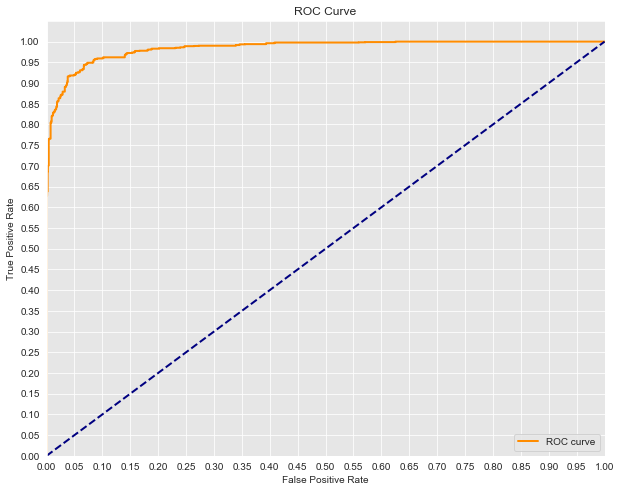

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [71]:
def pred_list_creator(prob_array): 
    pred_pos = []
    pred_neg = []
    for x in prob_array:
        if x[1]>.5:
            pred_pos.append(x[1])
        else:
            pred_neg.append(x[1])
    return pred_pos, pred_neg

In [72]:
log_gs_prob_data = logit_model_gs.predict_proba(X_test)
pred_pos, pred_neg = pred_list_creator(log_gs_prob_data)

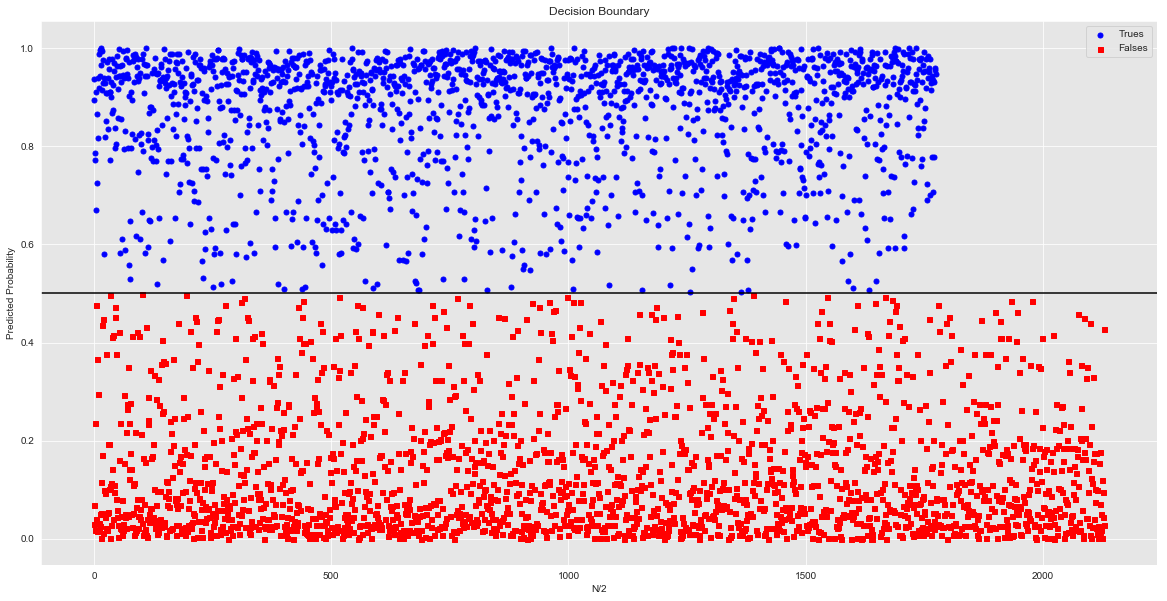

In [73]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure(figsize=[20,10])
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

plot_decision_boundary(pred_pos, pred_neg)

In [74]:
# import numpy as np
# np.random.seed(0)
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.model_selection import train_test_split, cross_val_score

In [75]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(data_for_model), columns=data_for_model.columns)
# scaled_df.head()

In [76]:
# REGULARIZATION STEP
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trans_X_train = scaler.fit_transform(X_train)
trans_X_test = scaler.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [77]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [78]:
adaboost_clf.fit(trans_X_train, y_train.astype(int))
gbt_clf.fit(trans_X_train, y_train.astype(int))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [79]:
adaboost_train_preds = adaboost_clf.predict(trans_X_train)
adaboost_test_preds = adaboost_clf.predict(trans_X_test)
gbt_clf_train_preds = gbt_clf.predict(trans_X_train)
gbt_clf_test_preds = gbt_clf.predict(trans_X_test)

In [80]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    recall = metrics.recall_score(true, preds)
    precision = metrics.precision_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    print("Recall: {}".format(recall))
    print("Precision: {}".format(precision))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7647058823529411
F1-Score: 0.7870499150054088
Recall: 0.8972868217054264
Precision: 0.7009358656757501

Model: Gradient Boosted Trees
Accuracy: 0.816272517715359
F1-Score: 0.8323987538940809
Recall: 0.9415081042988019
Precision: 0.7459519821328866

Testing Metrics
Model: AdaBoost
Accuracy: 0.7536491677336747
F1-Score: 0.7726843100189037
Recall: 0.8973655323819978
Precision: 0.6784232365145229

Model: Gradient Boosted Trees
Accuracy: 0.8025608194622279
F1-Score: 0.8167340147373425
Recall: 0.9429198682766191
Precision: 0.720335429769392


In [81]:
# >>> from sklearn import svm, datasets
# >>> from sklearn.model_selection import GridSearchCV
# >>> iris = datasets.load_iris()
# >>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# >>> svc = svm.SVC(gamma="scale")
# >>> clf = GridSearchCV(svc, parameters, cv=5)
# >>> clf.fit(iris.data, iris.target)

In [82]:
# SVM
from sklearn import svm


# Think about running through different kernels with GridSearchCV
SVM_method = svm.SVC(kernel='rbf')
svm_model = SVM_method.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [83]:
y_pred_train_svm = svm_model.predict(trans_X_train)
y_pred_test_svm = svm_model.predict(trans_X_test)

In [84]:
print("Training Metrics")
display_acc_and_f1_score(y_train, y_pred_train_svm, model_name='rbf SVM')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, y_pred_test_svm, model_name='rbf SVM')

Training Metrics
Model: rbf SVM
Accuracy: 0.5223256211047554
F1-Score: 0.028139656070870243
Recall: 0.01427061310782241
Precision: 1.0

Testing Metrics
Model: rbf SVM
Accuracy: 0.5370038412291933
F1-Score: 0.01525054466230937
Recall: 0.007683863885839737
Precision: 1.0


In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [86]:
NBC = GaussianNB()
nbc_model = NBC.fit(trans_X_train,y_train)

In [87]:
y_pred_train_nbc = nbc_model.predict(trans_X_train)
y_pred_test_nbc = nbc_model.predict(trans_X_test)

In [88]:
print("Training Metrics")
display_acc_and_f1_score(y_train, y_pred_train_nbc, model_name='Naive Bayes')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, y_pred_test_nbc, model_name='Naive Bayes')

Training Metrics
Model: Naive Bayes
Accuracy: 0.8400922052420388
F1-Score: 0.8024053170165629
Recall: 0.6700140944326991
Precision: 1.0

Testing Metrics
Model: Naive Bayes
Accuracy: 0.704225352112676
F1-Score: 0.759324859345697
Recall: 1.0
Precision: 0.6120255290560968


In [89]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# #Seaborns Beautiful Styling
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# print('AUC: {}'.format(auc(fpr_nbc, tpr_nbc)))
# plt.figure(figsize=(10,8))
# lw = 2
# plt.plot(fpr_nbc, tpr_nbc, color='darkorange',
#          lw=lw, label='ROC curve')
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.yticks([i/20.0 for i in range(21)])
# plt.xticks([i/20.0 for i in range(21)])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

In [90]:
# # SVM with GridSeachCV
# from sklearn.model_selection import GridSearchCV
# params = {'kernel':('linear', 'rbf'), 'C' : [1, 6]}
# svc_2 = svm.SVC()
# svc_gs = GridSearchCV(svc_2, params, cv=5)
# svm_model_gs = svc_gs.fit(trans_X_train,trans_y_train)

In [91]:
# svm_model_gs